# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = 'C:/Users/PERO/2nd-ML100Days/practice/data'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: C:/Users/PERO/2nd-ML100Days/practice/data\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [27]:
#1
"""
Your code here
"""
print(app_train['CNT_CHILDREN'].value_counts())
cut_rule = [-99,0,2,5,99]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()


0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64


(-99.001, 0.0]    215371
(0.0, 2.0]         87868
(2.0, 5.0]          4230
(5.0, 99.0]           42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [39]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP','TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
(-99.001, 0.0]      0         166747.010980
                    1         160804.210548
(0.0, 2.0]          0         174590.584401
                    1         176115.362720
(2.0, 5.0]          0         175053.742913
                    1         160677.385714
(5.0, 99.0]         0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [62]:
#請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
app_train[['AMT_INCOME_TOTAL','TARGET','CNT_CHILDREN_GROUP']].head()


,AMT_INCOME_TOTAL,TARGET,CNT_CHILDREN_GROUP
0,202500.0,1,"(-99.001, 0.0]"
1,270000.0,0,"(-99.001, 0.0]"
2,67500.0,0,"(-99.001, 0.0]"
3,135000.0,0,"(-99.001, 0.0]"
4,121500.0,0,"(-99.001, 0.0]"


In [64]:
#2-2
"""
Your code here
plt_column =
plt_by =

app_train.boxplot(column=grp, by = plt_by, showfliers = False, figsize=(12,12))
    #column: str or list of str
    #by: str or array-like
plt.suptitle('')
plt.show()
"""

print(grouped_df.describe())
plt_column =grp
plt_by =grouped_df.mean()
app_train.boxplot(column=grp, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

                              count           mean           std      min  \
CNT_CHILDREN_GROUP TARGET                                                   
(-99.001, 0.0]     0       198762.0  166747.010980  1.061799e+05  25650.0   
                   1        16609.0  160804.210548  8.483011e+04  25650.0   
(0.0, 2.0]         0        80081.0  174590.584401  1.201981e+05  26550.0   
                   1         7787.0  176115.362720  1.327159e+06  27900.0   
(2.0, 5.0]         0         3810.0  175053.742913  1.128427e+05  29250.0   
                   1          420.0  160677.385714  1.130315e+05  36000.0   
(5.0, 99.0]        0           33.0  139159.090909  7.112483e+04  45000.0   
                   1            9.0  180000.000000  7.377118e+04  90000.0   

                                25%       50%       75%          max  
CNT_CHILDREN_GROUP TARGET                                             
(-99.001, 0.0]     0       112500.0  144000.0  202500.0   13500000.0  
                

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

In [ ]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: )

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

## 練習

In [4]:
# 生成範例用的資料 ()
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])
print('df1\n',df1)
print('df2\n',df2)
print('df3\n',df3)
print('df4\n',df4)

df1
     A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
df2
     A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7
df3
       A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11
df4
     B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7


# 合併: pandas.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)

重要參數：

    objs: 參與concat的list or dict
    axis: 連接的方向
    join: 連接的方式是inner(交集)或outer(聯集)

In [9]:
# 沿縱軸合併(default)
result=pd.concat([df1,df2,df3])
    #by default: axis=0,
    #object uses list
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [10]:
result2=pd.concat([df1,df4])
    # cols(df1):[ A   B   C   D]
    # cols(df4):[B   D   F]
    # 在row方向合併，結果應為[A   B   C   D   F]
    # join為預設的'outer'
result2

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [13]:
result2=pd.concat([df1,df4],join='inner')
    #以交集方式合併，結果應為[B   D]
    #注意 交集 指的是有相同的column，不是值
    #axis=0, 在row方向上
result2

,B,D
0,B0,D0
1,B1,D1
2,B2,D2
3,B3,D3
2,B2,D2
3,B3,D3
6,B6,D6
7,B7,D7


In [11]:
# 沿橫軸合併
result = pd.concat([df1, df4], axis = 1)
    # cols(df1):[ A   B   C   D]
    # cols(df4):[B   D   F]
    # axis=1
    # 結果應為 [ A   B   C   D   B   D   F]
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [12]:
# 沿橫軸合併-2
result = pd.concat([df1, df4], axis = 1, join = 'inner') # 交集合併
    #和axis=0做比較
print(result)

result = pd.merge(df1, df4, how='inner')
print(result)

    A   B   C   D   B   D   F
2  A2  B2  C2  D2  B2  D2  F2
3  A3  B3  C3  D3  B3  D3  F3
    A   B   C   D   F
0  A2  B2  C2  D2  F2
1  A3  B3  C3  D3  F3


# pd.cut()
## pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise')
## x ： 必須是一維資料
## bins： 不同面元（不同範圍）型別:整數，序列如陣列, 和Interval Index
## right： 最後一個bins是否包含最右邊的資料，預設為True
## precision：精度 預設保留三位小數
## retbins： 即return bins 是否返回每一個bins的範圍 預設為False

In [15]:
#離散化age數列，分成“18到25”、“25到35”、“35到60”以及“60以上”，可以使用cut函數
#cut函数是利用數值區間將數值分類，qcut則是用分位數
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32, 101]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats
    #type: pandas.core.categorical.Categorical
'''
output:
[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (60, 100], (35, 60], (35, 60], (25, 35], NaN]
    #每個年齡分別在哪個範圍內，如果超出了就變成NaN缺失值
'''

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (60, 100], (35, 60], (35, 60], (25, 35], NaN]
Length: 13
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [17]:
#屬性
cats.codes
    #array([ 0,  0,  0,  1,  0,  0,  2,  1,  3,  2,  2,  1, -1], dtype=int8)

array([ 0,  0,  0,  1,  0,  0,  2,  1,  3,  2,  2,  1, -1], dtype=int8)

In [19]:
#賦予範圍標籤
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
cats = pd.cut(ages, bins,labels=group_names)
cats

[Youth, Youth, Youth, YoungAdult, Youth, ..., Senior, MiddleAged, MiddleAged, YoungAdult, NaN]
Length: 13
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

## Groupby 根據要的某一項資料做分組，根據不同組別做資料處理的概念。
DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, observed=False, **kwargs)


In [30]:
df = pd.DataFrame({'A': ['a', 'b', 'a', 'c', 'a', 'c', 'b', 'c'], 
                   'B': [2, 8, 1, 4, 3, 2, 5, 9], 
                   'C': [102, 98, 107, 104, 115, 87, 92, 123]})
df

,A,B,C
0,a,2,102
1,b,8,98
2,a,1,107
3,c,4,104
4,a,3,115
5,c,2,87
6,b,5,92
7,c,9,123


In [38]:
df_group=df.groupby('A')
    #groupby物件可視為dataframe的view, 在聚合計算(如mean(),sum()等)被設定前，不進行實際的運算，此作法稱為lazy evaluation
    #欲產生結果，必須套用一個聚合計算才會產生。
    #聚合運算：
        # count()
        # first()/ last()
        # mean()/ median()
        # min()/ max()
        # std()/ var()
        # sum()
print(df_group)
print(df_group.count())

   B  C
A      
a  3  3
b  2  2
c  3  3


## boxplot

In [42]:
df = pd.DataFrame(np.random.randn(10,4),columns=['Col1', 'Col2', 'Col3', 'Col4'])
df

,Col1,Col2,Col3,Col4
0,0.534251,1.526771,-1.724073,-0.275903
1,0.510795,-0.021047,-0.305945,-0.152795
2,0.516128,-1.593218,-1.412900,-0.946360
3,2.829568,0.749236,0.965685,0.462146
4,-0.642731,-0.369259,-1.752449,-0.964864
5,0.538265,-0.973116,0.856488,-0.922716
6,0.502460,-0.289273,1.794102,-1.617634
7,-0.840462,-0.529690,0.872039,-0.352677
8,-0.873583,0.457155,2.156526,-0.969189
9,-1.384186,-1.089527,1.440115,-0.986701


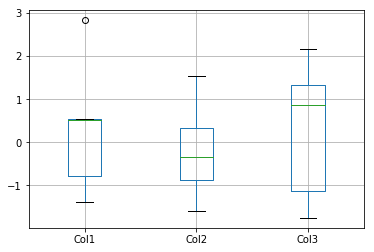

In [43]:
boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])

In [44]:
df = pd.DataFrame(np.random.randn(10, 2),columns=['Col1', 'Col2'])
df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A','B', 'B', 'B', 'B', 'B'])
df

,Col1,Col2,X
0,0.421168,1.628601,A
1,-1.698702,1.513827,A
2,1.281304,-0.668847,A
3,0.111016,-1.105845,A
4,-0.085019,-0.971524,A
5,-0.685781,-1.161224,B
6,-1.777316,0.379798,B
7,-1.281705,-0.362747,B
8,0.761548,0.709369,B
9,-0.854571,-0.626748,B


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000210C976F668>,
      dtype=object)

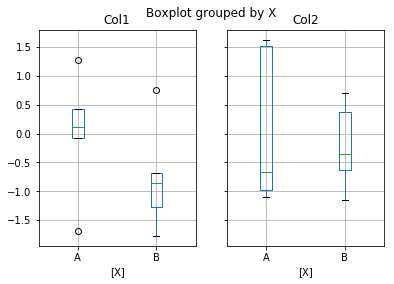

In [46]:
df.boxplot(by='X')